In [1]:
%matplotlib inline
%run ../../import_envs.py
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
%run PARAMETERS.py
NAME = 'APG'
PATH = NAME + '-%dpts-%dsamples' % (N*K, SAMPLE_SIZE)
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:0')

In [10]:
from model_operations import Init_models

models, _ = Init_models(K, 
                        D, 
                        hidden_list=HIDDEN_LIST, 
                        RECON_SIGMA=RECON_SIGMA, 
                        CUDA=CUDA, 
                        device=DEVICE, 
                        lr=LEARNING_RATE, 
                        RESTORE=True, 
                        PATH=PATH, 
                        NAME='APG')


models_vae, _ = Init_models(K, 
                        D, 
                        hidden_list=HIDDEN_LIST, 
                        RECON_SIGMA=RECON_SIGMA, 
                        CUDA=CUDA, 
                        device=DEVICE, 
                        lr=LEARNING_RATE, 
                        RESTORE=True, 
                        PATH=PATH, 
                        NAME='VAE')

In [11]:
from testing import Eval
from viz_mc import Viz_MC
from apg import APG_test
from vae import VAE_test
BATCH_SIZE = 5
Viz_INTERVAL = 4
FS = 25
TITLE_FS = 20
OB_MS = 2.0
MU_MARKER = 'X'
MU_MS = 100
OPACITY = 0.5
BOUND = 10
COLORS = ['#EE7733', '#0077BB', '#AA3377', '#009988']
DATA_PTR = 45

Data = []


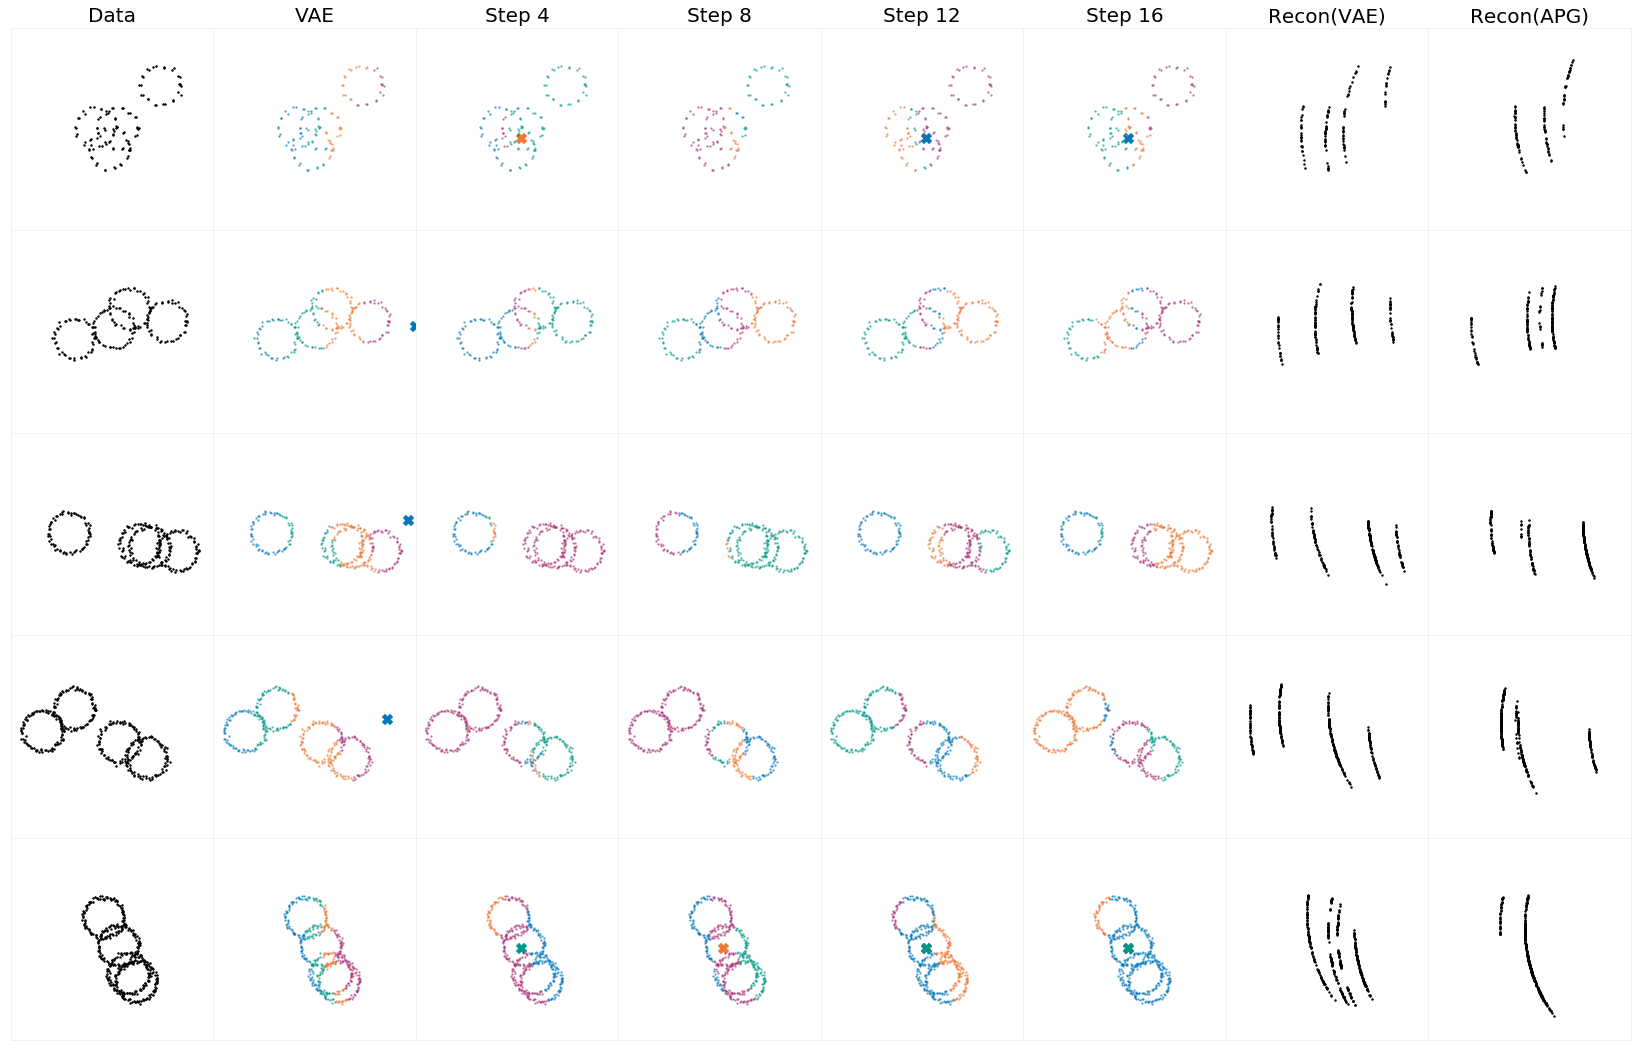

In [13]:
evaluator = Eval(K, D, BATCH_SIZE, CUDA, DEVICE)
visualizer = Viz_MC(K, Viz_INTERVAL, FS, TITLE_FS, OB_MS, MU_MARKER, MU_MS, OPACITY, BOUND, COLORS)
Metrics_sample = evaluator.Test_uniform(models, APG_test, Data, DATA_PTR, mcmc_steps=16, sample_size=1)
Metrics_sample_vae = evaluator.Test_uniform(models_vae, VAE_test, Data, DATA_PTR, mcmc_steps=0, sample_size=1)

visualizer.Plot_chains(Metrics_sample['data'], Metrics_sample['samples'], Metrics_sample['recon'], Metrics_sample_vae['samples'], Metrics_sample_vae['recon'], filename='ncmm-samples-%d' % DATA_PTR)

In [6]:
# L = 100
# Metrics_converge = evaluator.Test_uniform(APG_test, Data, DATA_PTR, mcmc_steps=40, sample_size=L)
# visualizer.Plot_metrics(Metrics_converge['log_joint'], Metrics_converge['elbos'], Metrics_converge['ess'], sample_size=L, filename='ncmm-metrics-1')